# Install library

Install important Libraries

In [449]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
#%pip install kagglehub
#%pip install ipywidgets
#%pip install numpy
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
#%pip install scikit-learn


# Import

import useful functions from libraries and dataset for modeling.

In [450]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #for plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import skew
from sklearn.model_selection import GridSearchCV
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./kaggle/input\titanic\gender_submission.csv
./kaggle/input\titanic\test.csv
./kaggle/input\titanic\train.csv


Aurentication

In [451]:
import kagglehub
kagglehub.login()

In [504]:
dataset = pd.read_csv("./kaggle/input/titanic/train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning

## Explore

In [505]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Numericals : 'Survived','PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare' <br>
Categories : 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'

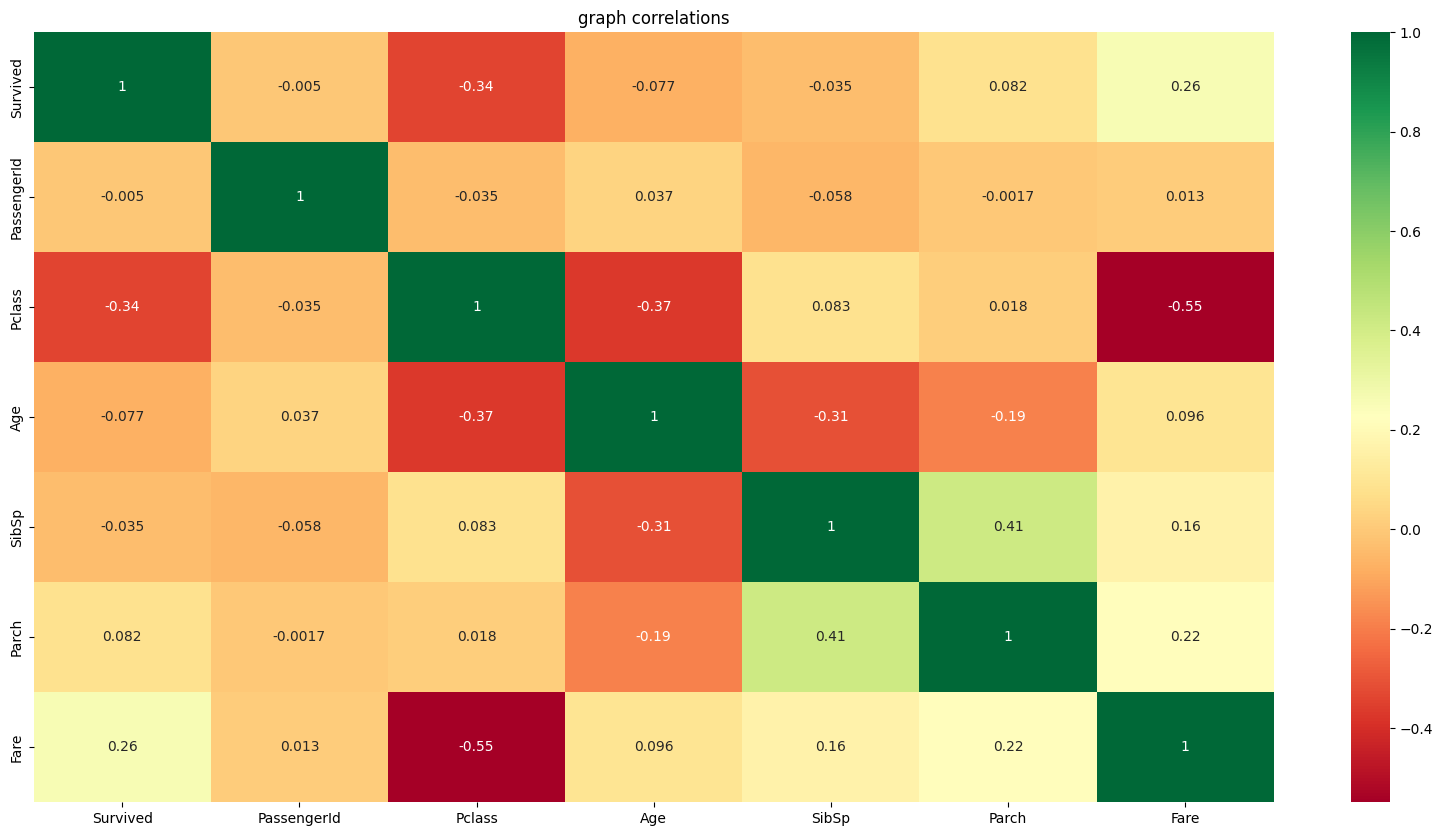

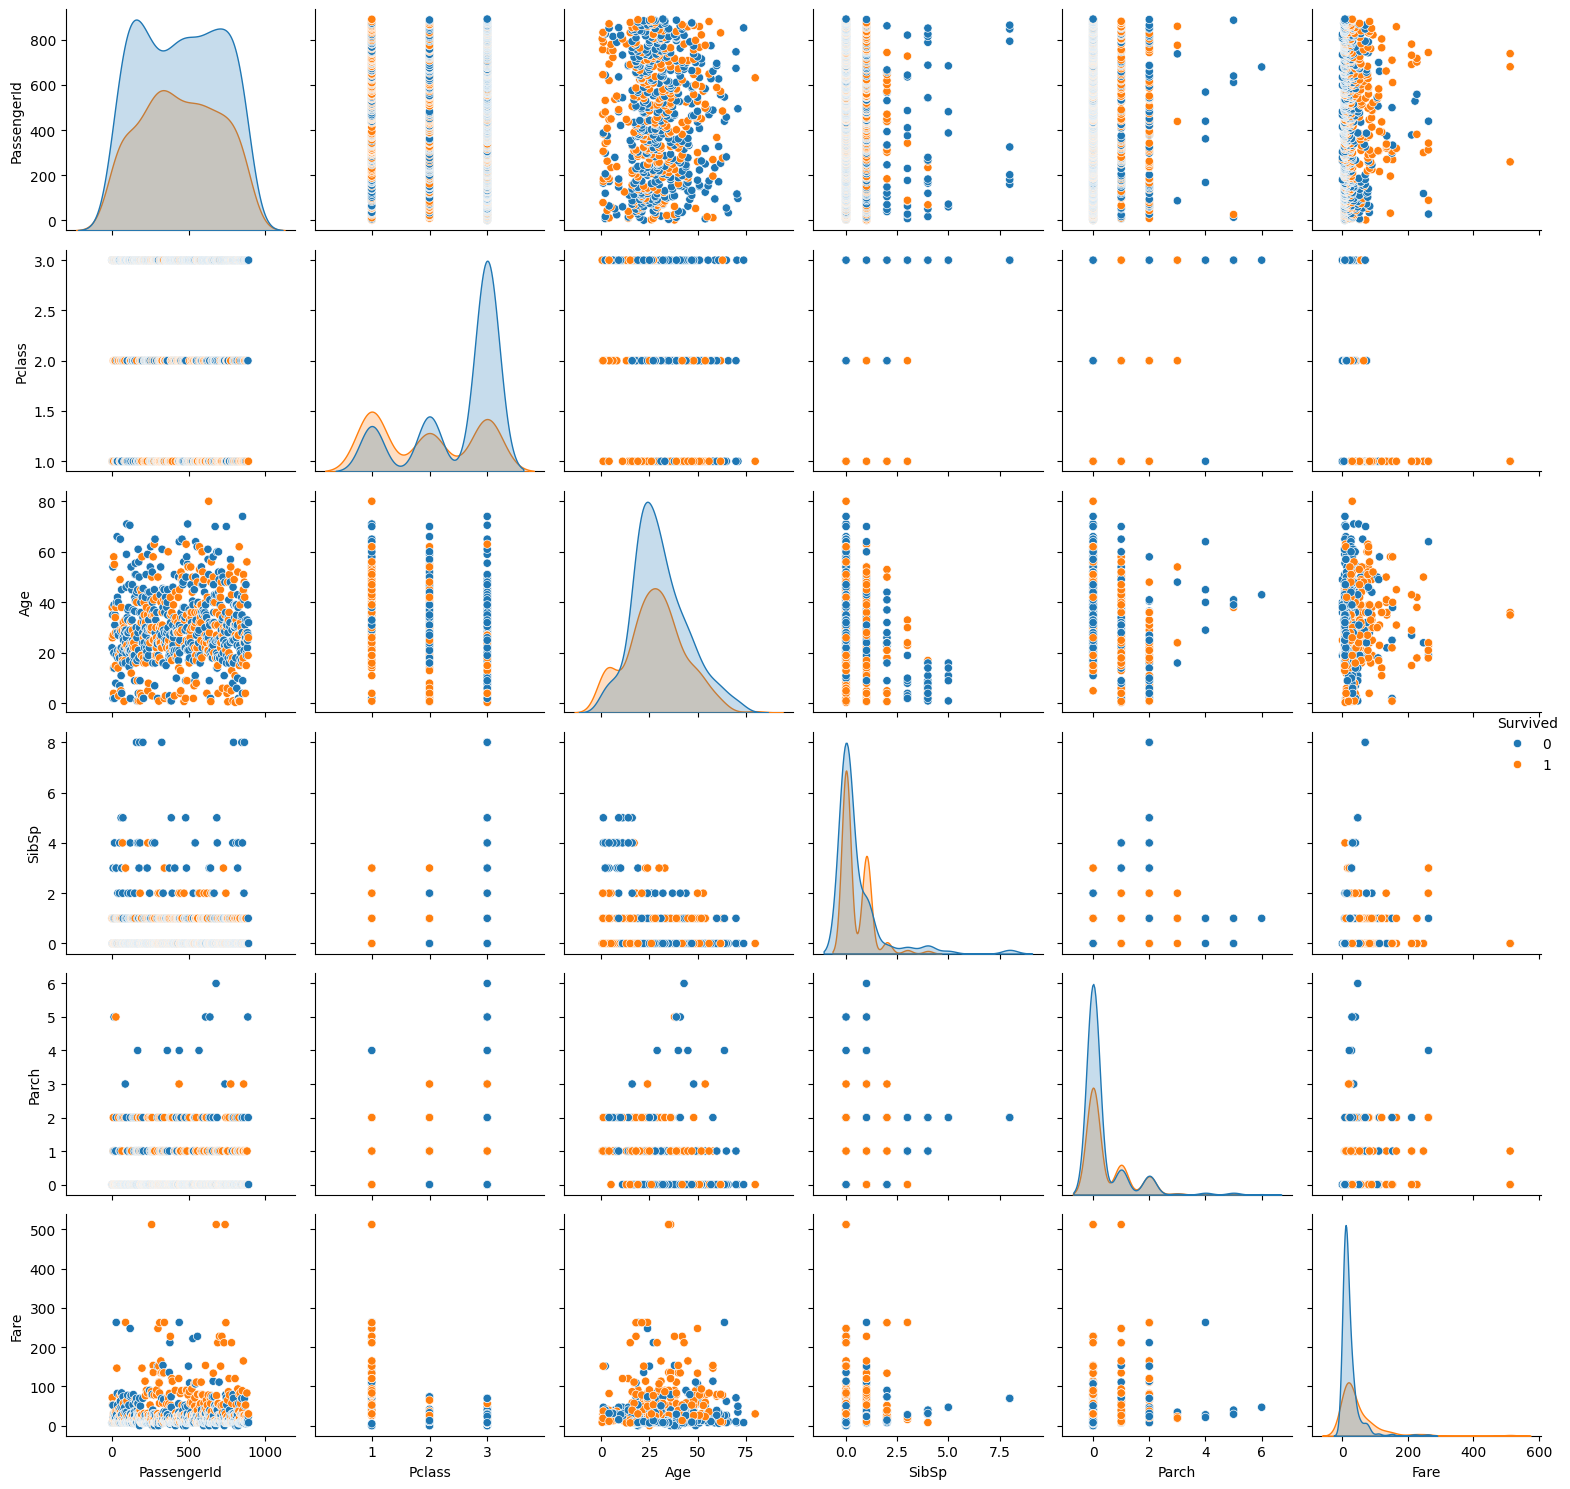

In [518]:
correlations = dataset.loc[:,['Survived','PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
fig, ax = plt.subplots(1, 1, figsize=(20,10))

sns.pairplot(correlations, hue='Survived')

sns.heatmap(correlations.corr(), ax = ax, annot=True,cmap='RdYlGn')
ax.set_title('graph correlations')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

As we can see we have Pclass, that have the most correlation.

In [455]:
#Check duplicated
dataset[dataset.duplicated()]
print("index unique is",dataset.index.is_unique)

index unique is True


In [456]:
#check missing values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

have 3 columns contain null values.
age, we will use mean to fill null values because it will reduce the right skew. 
cabin, we can use floor for passenger simple location.
Embarked, I will remove 2 rows because it didn't have much effect.

## Numeric

the aim is to improve sample that we get so we will use transformation and scaling for beautiful normal distribution.

#### Fare

4.787316519674893 too skew


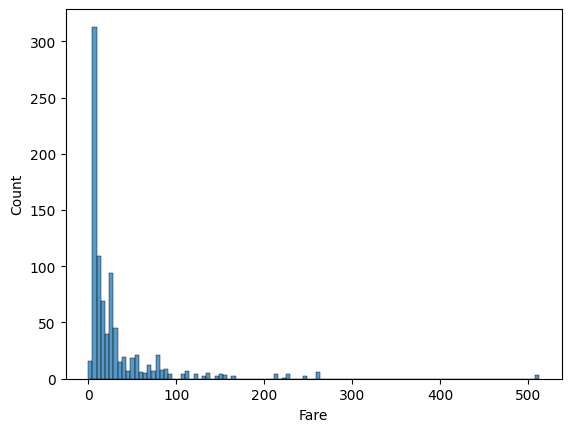

In [457]:
sns.histplot(dataset.Fare)
print(dataset.Fare.skew(), "too skew")

0.39426283638993376


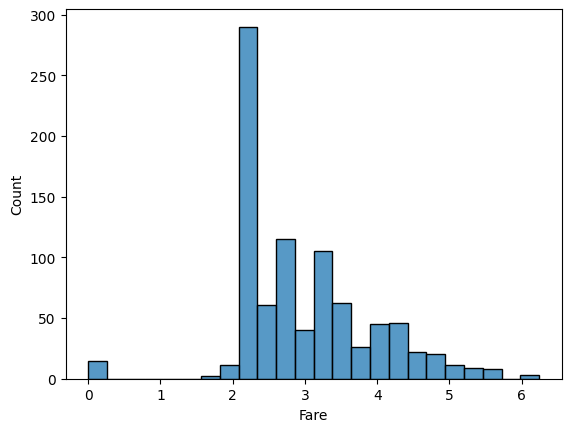

In [458]:
log_fare = np.log1p(dataset.Fare)
sns.histplot(log_fare)
print(skew(log_fare))

In [459]:
dataset.Fare = np.log1p(dataset.Fare)

#### Age

In [460]:
#Age missing
dataset.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

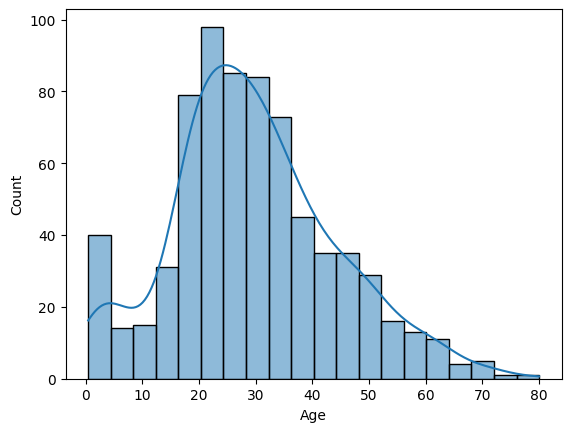

In [461]:
#check skew of Age = 0.3 good skew between -0.5 to 0.5
dataset.Age.skew()
#show bellcurve of Age to decide what null values should be replaced with.
sns.histplot(dataset.Age,kde=True)

In [462]:
dataset[dataset.Age < 0].head()
dataset[dataset.Age.isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.246893,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.639057,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,2.107178,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,2.107178,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,2.183711,NaN,Q


0.4344880940129925


C:\Users\parit\AppData\Local\Temp\ipykernel_15728\2261764763.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.Age.fillna(dataset.Age.mean(), inplace=True)


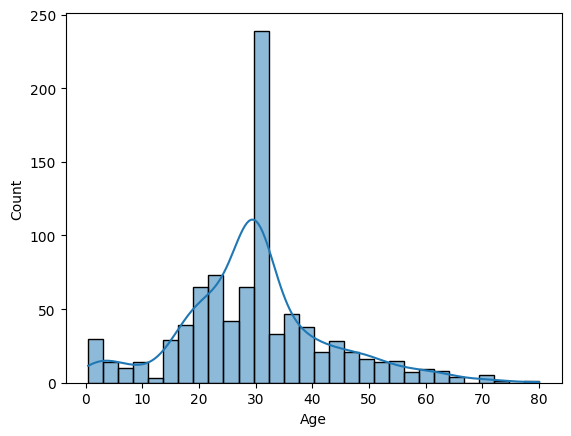

In [463]:
#fill na with median because from normal distribution we know right skew have Mode<Median<Mean
#we want bellcurve so we will fill with median or mean
dataset.Age.fillna(dataset.Age.mean(), inplace=True)
sns.histplot(dataset.Age,kde=True)
print(dataset.Age.skew())

## Categorical

#### Cabin (didn't work)

trying to use cabin another cabin for who doesn't have info about cabin by using surname (but in the end didn't use)

In [464]:
dataset.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/Olympic_%26_Titanic_cutaway_diagram.png" width="800" height="800" />

* it's categorical data
* approach 1: looking for the same surname so we can find the possible floor


In [465]:
haveCabin = dataset[dataset['Cabin'].isnull() == False].copy()
noCabin = dataset[dataset['Cabin'].isnull()].copy()

In [466]:
haveCabin['Surname'] = dataset['Name'].str.split(pat=',').str[0].copy()
noCabin['Surname'] = dataset['Name'].str.split(pat=',').str[0].copy()

In [467]:
haveCabin=haveCabin[['Surname','Cabin']].drop_duplicates()
haveCabin[haveCabin['Surname'] == 'Carlsson']

,Surname,Cabin
872,Carlsson,B51 B53 B55


In [468]:
have_reserved_cabin = noCabin[noCabin['Surname'].isin(haveCabin['Surname'])]
have_reserved_cabin.count()

PassengerId    20
Survived       20
Pclass         20
Name           20
Sex            20
Age            20
SibSp          20
Parch          20
Ticket         20
Fare           20
Cabin           0
Embarked       20
Surname        20
dtype: int64

In [469]:
have_reserved_cabin = have_reserved_cabin.merge(haveCabin,on='Surname',how='left')
have_reserved_cabin.drop('Cabin_x',axis=1,inplace = True)
have_reserved_cabin[have_reserved_cabin.Name.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname,Cabin_y
3,261,0,3,"Smith, Mr. Thomas",male,29.699118,0,0,384461,2.169054,Q,Smith,A7
4,261,0,3,"Smith, Mr. Thomas",male,29.699118,0,0,384461,2.169054,Q,Smith,A19
5,347,1,2,"Smith, Miss. Marion Elsie",female,40.000000,0,0,31418,2.639057,S,Smith,A7
6,347,1,2,"Smith, Miss. Marion Elsie",female,40.000000,0,0,31418,2.639057,S,Smith,A19
12,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.000000,1,1,29750,3.688879,S,Brown,B4
13,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.000000,1,1,29750,3.688879,S,Brown,F33
14,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.000000,1,1,29750,3.688879,S,Brown,B4
15,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.000000,1,1,29750,3.688879,S,Brown,F33


In [470]:
have_reserved_cabin[have_reserved_cabin.Name.duplicated(keep=False)]
have_reserved_cabin.drop([3,6,13,15],inplace=True)
have_reserved_cabin.rename(columns = {'Cabin_y': 'Cabin'}, inplace = True)
have_reserved_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname,Cabin
0,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,2.202765,S,Allen,B5
1,220,0,2,"Harris, Mr. Walter",male,30.000000,0,0,W/C 14208,2.442347,S,Harris,C83
2,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.000000,1,0,244252,3.295837,S,Carter,B96 B98
4,261,0,3,"Smith, Mr. Thomas",male,29.699118,0,0,384461,2.169054,Q,Smith,A19
5,347,1,2,"Smith, Miss. Marion Elsie",female,40.000000,0,0,31418,2.639057,S,Smith,A7
7,429,0,3,"Flynn, Mr. James",male,29.699118,0,0,364851,2.169054,Q,Flynn,E25
8,511,1,3,"Daly, Mr. Eugene Patrick",male,29.000000,0,0,382651,2.169054,Q,Daly,E17
9,512,0,3,"Webber, Mr. James",male,29.699118,0,0,SOTON/OQ 3101316,2.202765,S,Webber,E101
10,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,29.699118,0,2,2668,3.150952,C,Peter,F E69
11,571,1,2,"Harris, Mr. George",male,62.000000,0,0,S.W./PP 752,2.442347,S,Harris,C83


In [471]:
print(dataset.shape)
dataset = dataset.merge(have_reserved_cabin[['PassengerId','Cabin']], on='PassengerId', how='left')
dataset['Cabin_x'] = dataset['Cabin_x'].fillna(dataset['Cabin_y'])
dataset.drop(columns=['Cabin_y'],axis=1,inplace=True)
dataset.rename(columns = {'Cabin_x':'Cabin'},inplace=True)

(891, 12)


In [472]:
dataset['Cabin'].isnull().sum()

np.int64(667)

In [473]:
dataset.shape

(891, 12)

#### Parch

In [474]:
dataset.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

#### SipSp

In [475]:
dataset.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

#### P class

In [476]:
dataset.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### Embarked

In [477]:
dataset[dataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.394449,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.394449,B28,NaN


In [478]:
dataset.drop(index=[61,829],inplace=True)
dataset[dataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### PassengerId

In [479]:
dataset.drop(columns=['PassengerId'],inplace=True) #remove order

#### Ticket & Cabin

In [480]:
dataset.drop(columns=['Ticket'],axis=1, inplace=True)
dataset.drop(columns=['Cabin'],axis=1, inplace=True)

#### Name

In [481]:
dataset['Surname'] = dataset['Name'].str.split(pat=',').str[0].copy()

In [482]:
dataset[['Surname','Survived']].groupby('Surname').mean()

,Survived
Surname,
Abbing,0.0
Abbott,0.5
Abelson,0.5
Adahl,0.0
Adams,0.0
...,...
de Mulder,1.0
de Pelsmaeker,0.0
del Carlo,0.0


In [483]:
surname_encoded = dataset[['Surname','Survived']].groupby('Surname')['Survived'].mean().to_dict()
dataset['Surname_encoded'] = dataset['Surname'].map(surname_encoded)    
dataset['Surname_encoded']

0      0.000000
1      1.000000
2      1.000000
3      0.500000
4      0.500000
         ...   
886    0.000000
887    0.666667
888    0.000000
889    1.000000
890    0.000000
Name: Surname_encoded, Length: 889, dtype: float64

In [484]:
dataset['Name'].str.split(pat=',')
#dataset['Title_Name'] = dataset['Name'].str.split(pat=',').str[1].str.split(pat='. ').apply(lambda x: x[0])
#dataset['Real_Name'] = dataset['Name'].str.split(pat=',').str[1].str.split(pat='. ').apply(lambda x: " ".join(x[1:]))
#too uniques, with my opinion it can't improve anything.  
dataset.Surname.duplicated().sum()

np.int64(224)

#### Survived

In [485]:
survived_mean = dataset['Survived'].mean()

# After Preprocessing

In [486]:
selected = dataset.drop(['Name','Surname'],axis=1).columns
categorical = ['Sex','Embarked','Surname_encoded']
categorical_exclude_Surname = ['Sex','Embarked']
numerical = list(set(selected) - set(categorical))
print("Selected Columns: ",selected)
print("Numerical: ", numerical)
print("Categorical: ", categorical)

Selected Columns:  Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Surname_encoded'],
      dtype='object')
Numerical:  ['Parch', 'SibSp', 'Pclass', 'Age', 'Survived', 'Fare']
Categorical:  ['Sex', 'Embarked', 'Surname_encoded']


In [487]:
selected_columns = categorical + numerical
selected = dataset[selected]
X=selected.drop('Survived',axis=1)
y=selected.Survived

In [488]:
print(categorical)
for column in categorical_exclude_Surname:
    print(X[column].value_counts())

['Sex', 'Embarked', 'Surname_encoded']
Sex
male      577
female    312
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [489]:
# * we need to clean Surname if we want better score.
# print(X[X.groupby('Surname')['Surname'].transform('size')>1].Surname)

In [490]:
print(X)

     Pclass     Sex        Age  SibSp  Parch      Fare Embarked  \
0         3    male  22.000000      1      0  2.110213        S   
1         1  female  38.000000      1      0  4.280593        C   
2         3  female  26.000000      0      0  2.188856        S   
3         1  female  35.000000      1      0  3.990834        S   
4         3    male  35.000000      0      0  2.202765        S   
..      ...     ...        ...    ...    ...       ...      ...   
886       2    male  27.000000      0      0  2.639057        S   
887       1  female  19.000000      0      0  3.433987        S   
888       3  female  29.699118      1      2  3.196630        S   
889       1    male  26.000000      0      0  3.433987        C   
890       3    male  32.000000      0      0  2.169054        Q   

     Surname_encoded  
0           0.000000  
1           1.000000  
2           1.000000  
3           0.500000  
4           0.500000  
..               ...  
886         0.000000  
887        

#### One Hot

In [491]:
print(X.columns)
one_hot = ColumnTransformer(transformers=[('one_hot',OneHotEncoder(),categorical_exclude_Surname)],remainder='passthrough')
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out()
print(type(X))
print(one_hot.get_feature_names_out())

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Surname_encoded'],
      dtype='object')
<class 'numpy.ndarray'>
['one_hot__Sex_female' 'one_hot__Sex_male' 'one_hot__Embarked_C'
 'one_hot__Embarked_Q' 'one_hot__Embarked_S' 'remainder__Pclass'
 'remainder__Age' 'remainder__SibSp' 'remainder__Parch' 'remainder__Fare'
 'remainder__Surname_encoded']


In [492]:
# for column in one_hot.get_feature_names_out():
#     for i in [column[column.find('__')+2:]]:
#         print(i[i.find('_')+1:])

columns = [name[name.find('_')+1:] for name in [column[column.find('__')+2:] for column in one_hot.get_feature_names_out()]]
print(columns) 
print(X) 
X_df = pd.DataFrame(data=X,columns=columns)  
X_train, X_test, y_train, y_test, = train_test_split(X_df,y,test_size=0.30) 

['female', 'male', 'C', 'Q', 'S', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'encoded']
[[0.         1.         0.         ... 0.         2.1102132  0.        ]
 [1.         0.         1.         ... 0.         4.28059312 1.        ]
 [1.         0.         0.         ... 0.         2.18885633 1.        ]
 ...
 [1.         0.         0.         ... 2.         3.19663022 0.        ]
 [0.         1.         1.         ... 0.         3.4339872  1.        ]
 [0.         1.         0.         ... 0.         2.1690537  0.        ]]


In [493]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [494]:
X_test=ss.transform(X_test)

#### Tunning

In [495]:
param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth' : [None, 10,20,30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'bootstrap' : [True, False]
}

clf = RandomForestClassifier(max_depth=10)
grid_search = GridSearchCV(clf, param_grid, cv = 5, scoring='accuracy', n_jobs=-1, verbose=2)   
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


### Predict with RandomForest (Training)

In [496]:
clf = RandomForestClassifier(**grid_search.best_params_)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [497]:
accuracy_score(y_test, y_pred)

0.9850187265917603

In [498]:
X_df

,female,male,C,Q,S,Pclass,Age,SibSp,Parch,Fare,encoded
0,0.0,1.0,0.0,0.0,1.0,3.0,22.000000,1.0,0.0,2.110213,0.000000
1,1.0,0.0,1.0,0.0,0.0,1.0,38.000000,1.0,0.0,4.280593,1.000000
2,1.0,0.0,0.0,0.0,1.0,3.0,26.000000,0.0,0.0,2.188856,1.000000
3,1.0,0.0,0.0,0.0,1.0,1.0,35.000000,1.0,0.0,3.990834,0.500000
4,0.0,1.0,0.0,0.0,1.0,3.0,35.000000,0.0,0.0,2.202765,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,1.0,2.0,27.000000,0.0,0.0,2.639057,0.000000
885,1.0,0.0,0.0,0.0,1.0,1.0,19.000000,0.0,0.0,3.433987,0.666667
886,1.0,0.0,0.0,0.0,1.0,3.0,29.699118,1.0,2.0,3.196630,0.000000
887,0.0,1.0,1.0,0.0,0.0,1.0,26.000000,0.0,0.0,3.433987,1.000000


### Predict with RandomForest (Trainned)

In [499]:
test_data = pd.read_csv("./kaggle/input/titanic/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [500]:
test_data['Surname'] = test_data['Name'].str.split(pat=',').str[0].copy()
test_data['Surname_encoded'] = test_data['Surname'].map(surname_encoded)
test_data['Surname_encoded'].fillna(survived_mean,inplace=True)

selected = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Surname_encoded']
print(test_data[selected])
X_test_encode = one_hot.transform(test_data[selected])


     Pclass     Sex   Age  SibSp  Parch      Fare Embarked  Surname_encoded
0         3    male  34.5      0      0    7.8292        Q         0.750000
1         3  female  47.0      1      0    7.0000        S         0.382452
2         2    male  62.0      0      0    9.6875        Q         0.382452
3         3    male  27.0      0      0    8.6625        S         0.382452
4         3  female  22.0      1      1   12.2875        S         1.000000
..      ...     ...   ...    ...    ...       ...      ...              ...
413       3    male   NaN      0      0    8.0500        S         0.382452
414       1  female  39.0      0      0  108.9000        C         0.382452
415       3    male  38.5      0      0    7.2500        S         0.382452
416       3    male   NaN      0      0    8.0500        S         0.382452
417       3    male   NaN      1      1   22.3583        C         1.000000

[418 rows x 8 columns]


C:\Users\parit\AppData\Local\Temp\ipykernel_15728\3409601343.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Surname_encoded'].fillna(survived_mean,inplace=True)


In [501]:
prediction = clf.predict(X_test_encode)

# Export

In [502]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
output.to_csv('submission.csv', index=False)
print("Completed!!!!")

Completed!!!!
